# Transmissão COVID

Este projeto tem como foco identificar uma pessoa que está contaminada com COVID e outra pessoa que não está, verificando qual o caminho mais propício para a transmissão do vírus

Vamos importar as bibliotecas que vão nos ajudar a visualizar o grafo e também nos oferecer um conjunto de grafos já construído

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Aqui importamos os dados das relações dos personagens de os Miseráveis, cujo grafo vamos utilizar para simular as relações entre as pessoas

In [2]:
g = nx.generators.social.les_miserables_graph()

Aqui vamos plotar o grafo para identificar as relações de uma forma mais abstrata

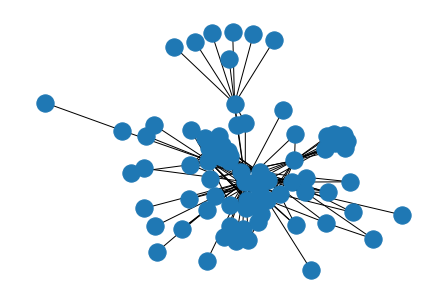

In [3]:
nx.draw(g)
plt.show()

O objeto grafo que temos está em uma classe Graph, do próprio NetworkX, porém para manipulá-lo e utilizar um estrutura de dados que não simplifique muito, vamos converte para um dicionário em Python, que vai servir para simular uma lista de adjacência.

In [4]:
G_dict = nx.convert.to_dict_of_dicts(g)

Aqui vamos ver qual o formato da estrutura de dados e como os dados estão distribuídos no grafo.

In [5]:
for k,v in G_dict.items():
    print(k,v)

Napoleon {'Myriel': {'weight': 1}}
Myriel {'Napoleon': {'weight': 1}, 'MlleBaptistine': {'weight': 8}, 'MmeMagloire': {'weight': 10}, 'CountessDeLo': {'weight': 1}, 'Geborand': {'weight': 1}, 'Champtercier': {'weight': 1}, 'Cravatte': {'weight': 1}, 'Count': {'weight': 2}, 'OldMan': {'weight': 1}, 'Valjean': {'weight': 5}}
MlleBaptistine {'Myriel': {'weight': 8}, 'MmeMagloire': {'weight': 6}, 'Valjean': {'weight': 3}}
MmeMagloire {'Myriel': {'weight': 10}, 'MlleBaptistine': {'weight': 6}, 'Valjean': {'weight': 3}}
CountessDeLo {'Myriel': {'weight': 1}}
Geborand {'Myriel': {'weight': 1}}
Champtercier {'Myriel': {'weight': 1}}
Cravatte {'Myriel': {'weight': 1}}
Count {'Myriel': {'weight': 2}}
OldMan {'Myriel': {'weight': 1}}
Valjean {'Labarre': {'weight': 1}, 'MmeMagloire': {'weight': 3}, 'MlleBaptistine': {'weight': 3}, 'Myriel': {'weight': 5}, 'Marguerite': {'weight': 1}, 'MmeDeR': {'weight': 1}, 'Isabeau': {'weight': 1}, 'Gervais': {'weight': 1}, 'Fantine': {'weight': 9}, 'MmeThenardi

A primeira coisa que temos que pensar é que o peso da relações é grande quando a relação é forte, porém se pensarmos no algoritmo de Djikstra, ele busca o caminho de menor peso, por isso é essencial que inverta-se os pesos das relações, pro exemplo:

- Myriel -> MlleBaptistine: {'weight': 8}

Precisamos que este peso inverta-se, porém vamos ver quais são os intervalos destes valores para assim poder fazer a inversão.